In [1]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data = pd.read_csv('dataset_drugs.csv')
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Heather Hatfield,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Eddie Murray,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Elizabeth Owens,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Melissa Beltran,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Nicole Butler,Hispanic,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
data.shape

(362806, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [6]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [8]:
data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Reviews has 37 missing values

In [9]:
data.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


In [11]:
data.describe(include='object').T

,count,unique,top,freq
Name,362806,180987,Michael Smith,171
Race,362806,4,White,115548
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460


Age group between 45 to 54 is the highest.

Female patients are more than male patients.

The use of cymbalta is highest when compared with other drugs.

In [12]:
data.duplicated().sum()

0

No duplicates found

#### Unique occurrences of each variable

In [13]:
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Name : 180987 

Race : 4 

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250167 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 



'Sex' has three categories.

Four different races are present.

'Drug' has more values than 'DrugId'.

'Condition' has lesser values than 'Drug'/'DrugId'.

'Reviews' has close to 70% unique values.

In [14]:
data['Race'].value_counts()

White       115548
Hispanic    101799
Black        80051
Asian        65408
Name: Race, dtype: int64

Most number of people are Whites and Hispanic.

In [15]:
data['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

Most number of people falls under the age of 45 - 54.

In [16]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

Most consumed drug is cymbalta. 

In [17]:
data['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

### Selection of drug: A particular drug named cymbalta with DrugId 91491 is selected in building a classification model to determine side effects

In [18]:
data=data.drop(data.loc[(data['DrugId']!=91491)].index)

In [19]:
data.shape

(4648, 14)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 314212 to 319085
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           4648 non-null   object
 1   Race           4648 non-null   object
 2   Age            4648 non-null   object
 3   Condition      4648 non-null   object
 4   Date           4648 non-null   object
 5   Drug           4648 non-null   object
 6   DrugId         4648 non-null   int64 
 7   EaseofUse      4648 non-null   int64 
 8   Effectiveness  4648 non-null   int64 
 9   Reviews        4648 non-null   object
 10  Satisfaction   4648 non-null   int64 
 11  Sex            4648 non-null   object
 12  Sides          4648 non-null   object
 13  UsefulCount    4648 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 544.7+ KB


In [21]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
314212,Steven Bolton,Hispanic,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,No Script or health Insurance needed to place ...,5,,"Nausea , dry mouth , constipation , loss of ...",12
314216,Zachary Smith,White,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314223,Christopher Schroeder,Black,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5,5,Switched from Effexor to this medicine after 1...,5,,"Nausea , dry mouth , constipation , loss of ...",0
314235,Rhonda Lowe,White,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314246,Samuel Robertson,Asian,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,"I have depression, anxiety, Fibro, severe musc...",2,,"Nausea , dry mouth , constipation , loss of ...",1


### Now dataset contains the data of only one drug 'cymbalta'.

#### DATA PREPROCESSING

In [22]:
data['Age'].value_counts()

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
               118
75 or over     102
13-18           34
0-2              1
7-12             1
Name: Age, dtype: int64

Most number of people are in the Age of 45 - 54.

In [23]:
data['Condition'].value_counts()

Major Depressive Disorder                                    1939
Neuropathic Pain                                              699
Repeated Episodes of Anxiety                                  577
Other                                                         514
Disorder characterized by Stiff, Tender & Painful Muscles     409
Chronic Muscle or Bone Pain                                   405
Anxiousness associated with Depression                         55
Diabetic Complication causing Injury to some Body Nerves       50
Name: Condition, dtype: int64

Most number of people falls under Major Depressive Disorder condition.

In [24]:
data['EaseofUse'].value_counts()

5    2502
4     998
3     484
1     476
2     188
Name: EaseofUse, dtype: int64

In [25]:
data['Effectiveness'].value_counts()

5    1369
4    1102
1     953
3     810
2     414
Name: Effectiveness, dtype: int64

In [26]:
data['Reviews'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      502
good                                                                                                                                                                                                                                                                                                                                                                                                                          

In [27]:
data['Sides'].value_counts()

Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.    4648
Name: Sides, dtype: int64

In [28]:
data['UsefulCount'].nunique()

69

In [29]:
data.Reviews.nunique()

4141

### The columns 'Review' contains 4141 unique entries.so we can neglect the column.Also, the column 'Name', 'Date' , 'DrugId' can be dropped since it is irrelevent to the dataset now.Finally, the column 'Sides' can also be dropped as the side effects are same. Including column' Effectiveness' to know the intensity of side effects.

In [30]:
data=data.drop(['Name', 'Date','Drug','DrugId','Sides','Reviews'],axis=1)

In [31]:
data.shape

(4648, 8)

In [32]:
data.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
314212,Hispanic,,Major Depressive Disorder,5,5,5,,12
314216,White,45-54,Repeated Episodes of Anxiety,3,1,1,Male,0
314223,Black,45-54,Anxiousness associated with Depression,5,5,5,,0
314235,White,35-44,Anxiousness associated with Depression,3,3,2,Female,0
314246,Asian,55-64,Chronic Muscle or Bone Pain,2,2,2,,1


In [33]:
data.isna().sum()

Race             0
Age              0
Condition        0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
UsefulCount      0
dtype: int64

In [34]:
data['Age'].value_counts()

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
               118
75 or over     102
13-18           34
0-2              1
7-12             1
Name: Age, dtype: int64

### Handling Missing Values
As we can see a blank space in the 'Age' column, we can fill it with ' 3-6' as it is missing from the range of values of Age

In [35]:
data['Age'].replace(to_replace = [' '], value = '3-6', inplace = True)

In [36]:
data['Age'].value_counts()

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
3-6            118
75 or over     102
13-18           34
0-2              1
7-12             1
Name: Age, dtype: int64

In [37]:
data["Sex"].value_counts()

Female    3621
Male       830
           197
Name: Sex, dtype: int64

In [38]:
data['Sex'].replace(to_replace = [' '], value = 'Other', inplace = True)

In [39]:
data["Sex"].value_counts()

Female    3621
Male       830
Other      197
Name: Sex, dtype: int64

### CORRELATION

<AxesSubplot:>

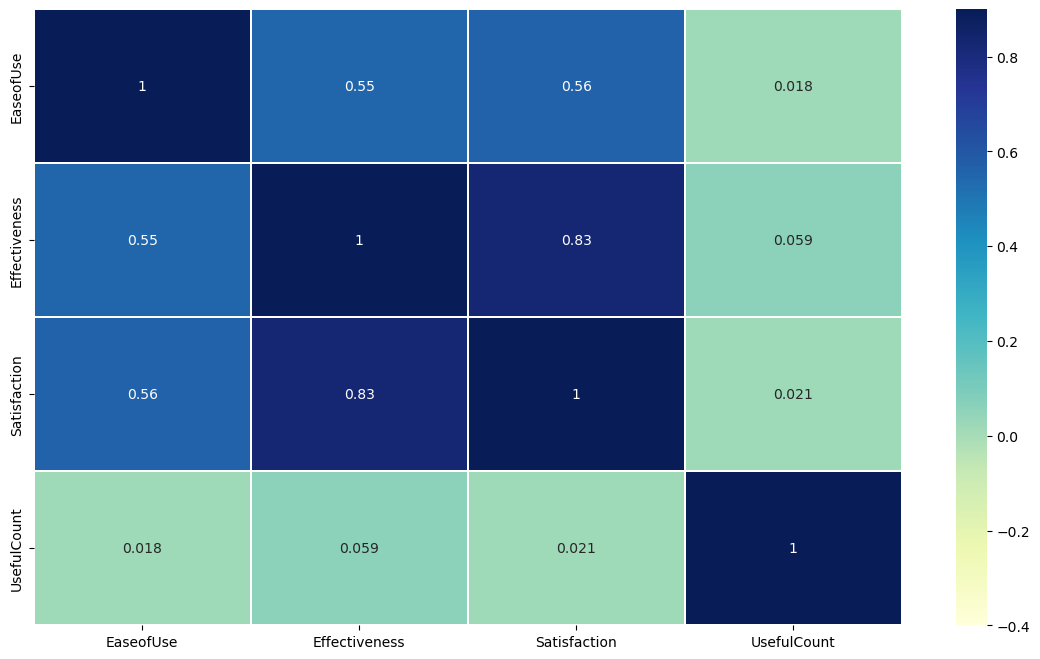

In [40]:
corrmatrix = data.corr()
plt.subplots(figsize=(14,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

High Correlation between Effectiveness and Satisfaction

### Checking for Outliers in Dataset

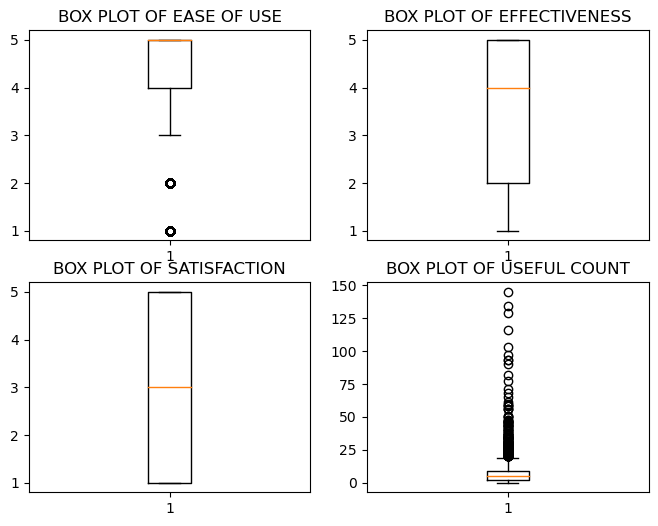

In [41]:
#We can spot outliers by plotting box plots.
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.boxplot(data["EaseofUse"])
plt.title("BOX PLOT OF EASE OF USE")

plt.subplot(2,2,2)
plt.boxplot(data["Effectiveness"])
plt.title("BOX PLOT OF EFFECTIVENESS")

plt.subplot(2,2,3)
plt.boxplot(data["Satisfaction"])
plt.title("BOX PLOT OF SATISFACTION")

plt.subplot(2,2,4)
plt.boxplot(data["UsefulCount"])
plt.title("BOX PLOT OF USEFUL COUNT")

plt.show()

Outliers spotted in the column ' Useful Count ' and ' Ease of use '.

In [42]:
#Indexing Outliers in the column ' Useful Count ' with IQR Method.
Q1=np.percentile(data["UsefulCount"],25,interpolation="midpoint")
Q3=np.percentile(data["UsefulCount"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit =",upper)

lower limit= -8.5
upperlimit = 19.5


In [43]:
outlier = []
for x in data['UsefulCount']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier

[22,
 27,
 30,
 30,
 28,
 21,
 36,
 35,
 34,
 25,
 39,
 56,
 29,
 71,
 23,
 29,
 21,
 32,
 24,
 22,
 21,
 25,
 21,
 25,
 32,
 22,
 30,
 20,
 42,
 30,
 22,
 103,
 38,
 28,
 30,
 33,
 26,
 61,
 25,
 26,
 28,
 41,
 93,
 90,
 134,
 145,
 51,
 27,
 29,
 43,
 39,
 30,
 22,
 21,
 35,
 33,
 48,
 36,
 56,
 27,
 38,
 21,
 24,
 30,
 22,
 22,
 21,
 31,
 21,
 21,
 25,
 93,
 24,
 31,
 35,
 82,
 20,
 33,
 25,
 58,
 20,
 46,
 21,
 47,
 45,
 44,
 34,
 60,
 48,
 26,
 29,
 50,
 36,
 20,
 25,
 47,
 20,
 20,
 23,
 41,
 26,
 21,
 22,
 25,
 21,
 23,
 22,
 28,
 22,
 21,
 28,
 20,
 42,
 27,
 20,
 28,
 22,
 26,
 25,
 29,
 23,
 26,
 116,
 21,
 51,
 40,
 29,
 20,
 28,
 28,
 25,
 21,
 34,
 31,
 30,
 23,
 20,
 20,
 26,
 35,
 29,
 65,
 24,
 22,
 30,
 20,
 26,
 34,
 20,
 21,
 46,
 23,
 20,
 23,
 27,
 27,
 35,
 21,
 25,
 20,
 21,
 21,
 28,
 97,
 23,
 23,
 22,
 33,
 56,
 45,
 22,
 39,
 21,
 23,
 41,
 77,
 31,
 129,
 24,
 22,
 20,
 31,
 24,
 34,
 22,
 20,
 21,
 23,
 24,
 21,
 22,
 22,
 21,
 20,
 29,
 22,
 22,
 23,
 20,


In [44]:
data=data.drop(data.loc[data["UsefulCount"]>upper].index)

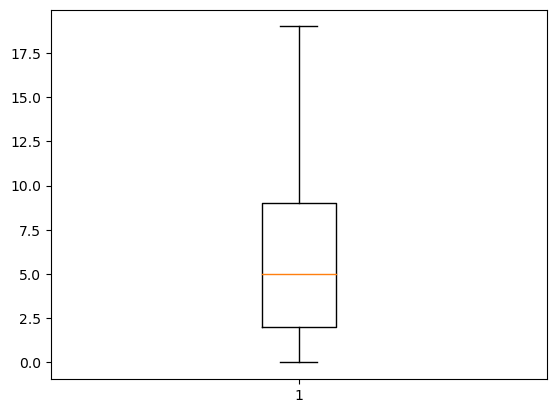

In [45]:
plt.boxplot(data["UsefulCount"])
plt.show()

In [46]:
#Indexing Outliers in the column ' Ease of Use ' with IQR Method.
Q1=np.percentile(data["EaseofUse"],25,interpolation="midpoint")
Q3=np.percentile(data["EaseofUse"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)

lower limit= 2.5
upperlimit =  6.5


In [47]:
outlier = []
for x in data['EaseofUse']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier

[2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,


In [48]:
data=data.drop(data.loc[data["EaseofUse"]>upper].index)
data=data.drop(data.loc[data["EaseofUse"]<low].index)

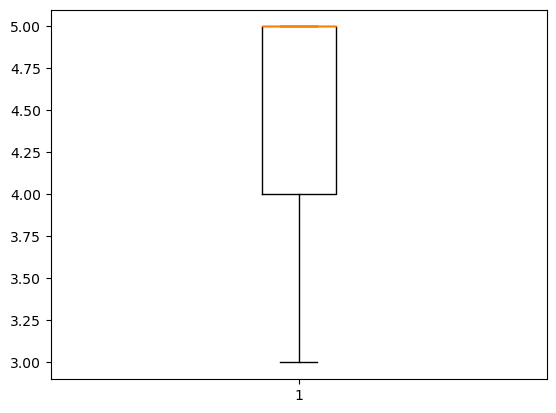

In [49]:
plt.boxplot(data["EaseofUse"])
plt.show()

Outliers removed from both 'UsefulCount' and 'EaseofUse'columns.

In [50]:
data.shape

(3769, 8)

In [51]:
my_list = list(range(3769))
data = data.set_index([my_list])

In [52]:
data.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,Hispanic,3-6,Major Depressive Disorder,5,5,5,Other,12
1,White,45-54,Repeated Episodes of Anxiety,3,1,1,Male,0
2,Black,45-54,Anxiousness associated with Depression,5,5,5,Other,0
3,White,35-44,Anxiousness associated with Depression,3,3,2,Female,0
4,White,55-64,Anxiousness associated with Depression,3,3,1,Other,1


#### Replacing the values of the column ' Effectiveness ' into categorical values as No side effects,Mild side effects ,Moderate side effects,Severe side effects,Extreme severe side effects.

In [60]:
data['Effectiveness'].replace(to_replace = [1], value =['Extreme severe side effects'], inplace = True)

In [61]:
data['Effectiveness'].replace(to_replace = [2], value =['Severe side effects'], inplace = True)

In [62]:
data['Effectiveness'].replace(to_replace = [3], value =['Moderate side effects'], inplace = True)

In [63]:
data['Effectiveness'].replace(to_replace = [4], value =['Mild side effects'], inplace = True)

In [64]:
data['Effectiveness'].replace(to_replace = [5], value =['No side effects'], inplace = True)

In [66]:
data.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,Hispanic,3-6,Major Depressive Disorder,5,no side effects,5,Other,12
1,White,45-54,Repeated Episodes of Anxiety,3,extreme severe side effects,1,Male,0
2,Black,45-54,Anxiousness associated with Depression,5,no side effects,5,Other,0
3,White,35-44,Anxiousness associated with Depression,3,moderate side effects,2,Female,0
4,White,55-64,Anxiousness associated with Depression,3,moderate side effects,1,Other,1


### DATA VISUALIZATION

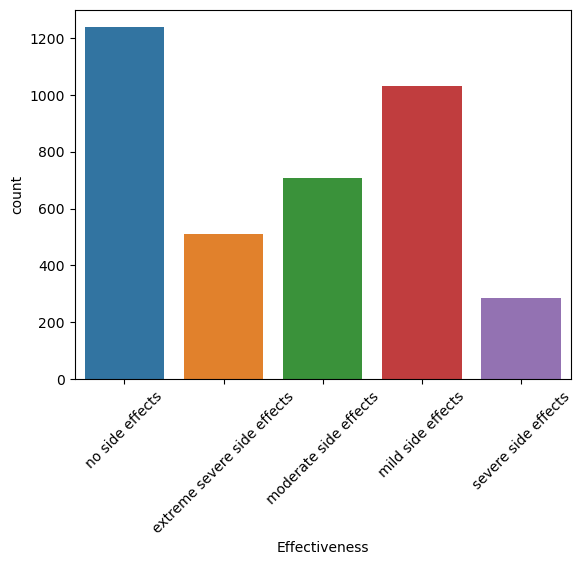

In [67]:
sns.countplot(data['Effectiveness'],data=data)
plt.xticks(rotation=45)
plt.show()

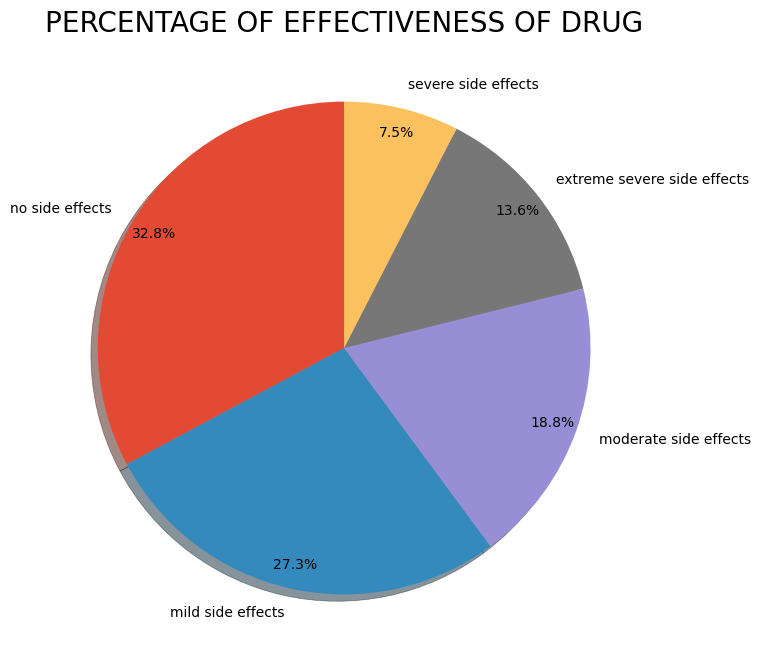

In [70]:
plt.figure(figsize=(16,8))
plt.title('PERCENTAGE OF EFFECTIVENESS OF DRUG',fontsize=20)
tr = pd.DataFrame(data['Effectiveness'].value_counts())
tr_names = tr.index
count = tr['Effectiveness']
plt.style.use('ggplot')
plt.rc('font', size=10)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)
plt.show()

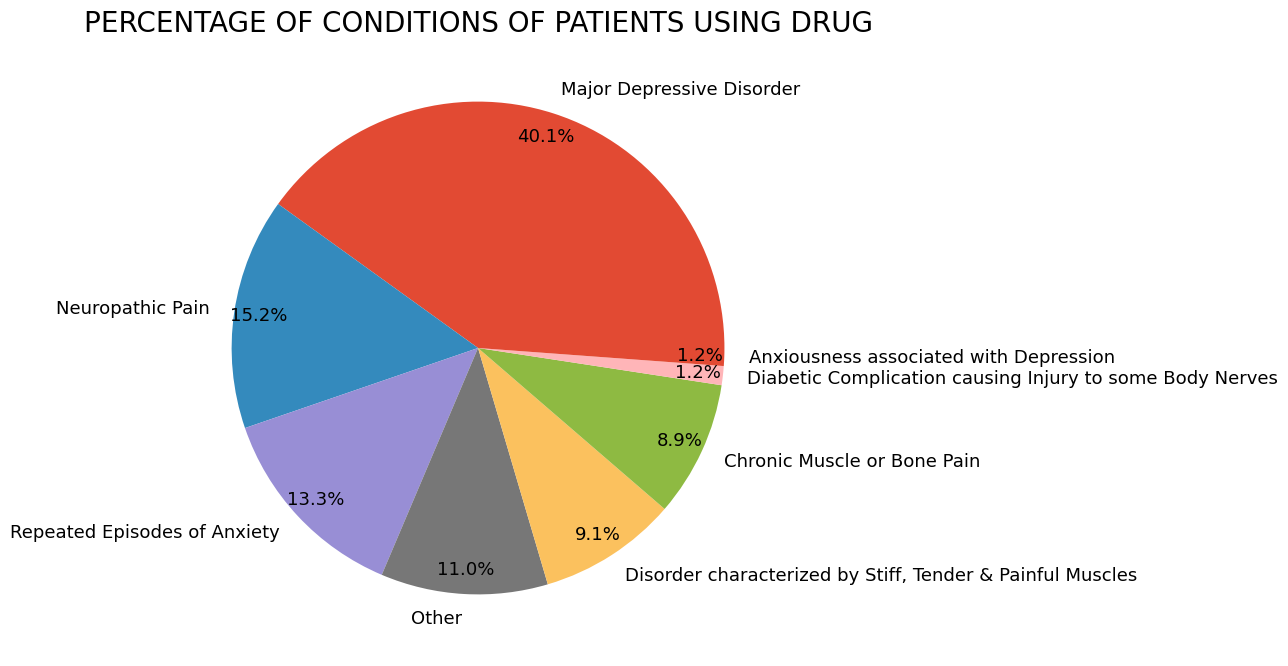

In [72]:
plt.figure(figsize=(16,8))
plt.title('PERCENTAGE OF CONDITIONS OF PATIENTS USING DRUG',fontsize=20)
tr = pd.DataFrame(data['Condition'].value_counts())
tr_names = tr.index
count = tr['Condition']
plt.style.use('ggplot')
plt.rc('font', size=13)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1)
plt.show()

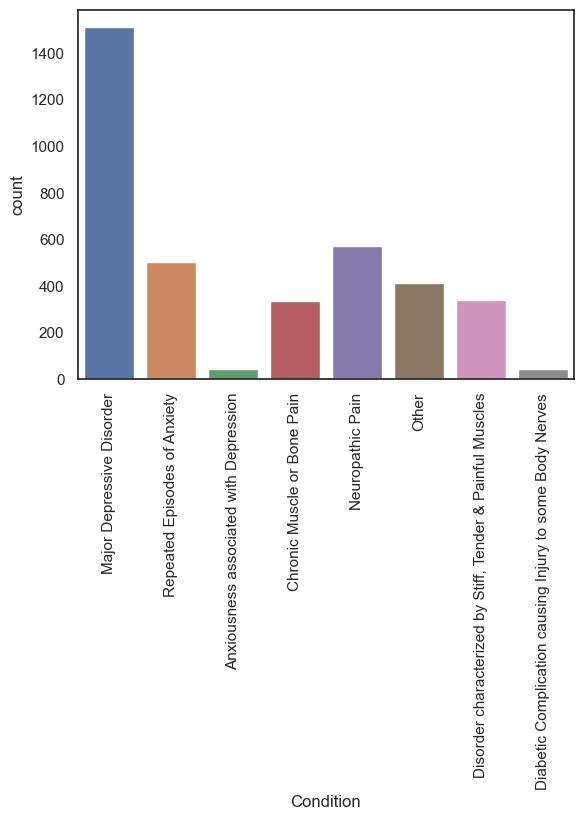

In [77]:
sns.set(style="white")
ax = sns.countplot(x='Condition',  data=data)
plt.xticks(rotation=90)
plt.show()

In [78]:
datac1=data.loc[(data['Condition']=="Major Depressive Disorder")]

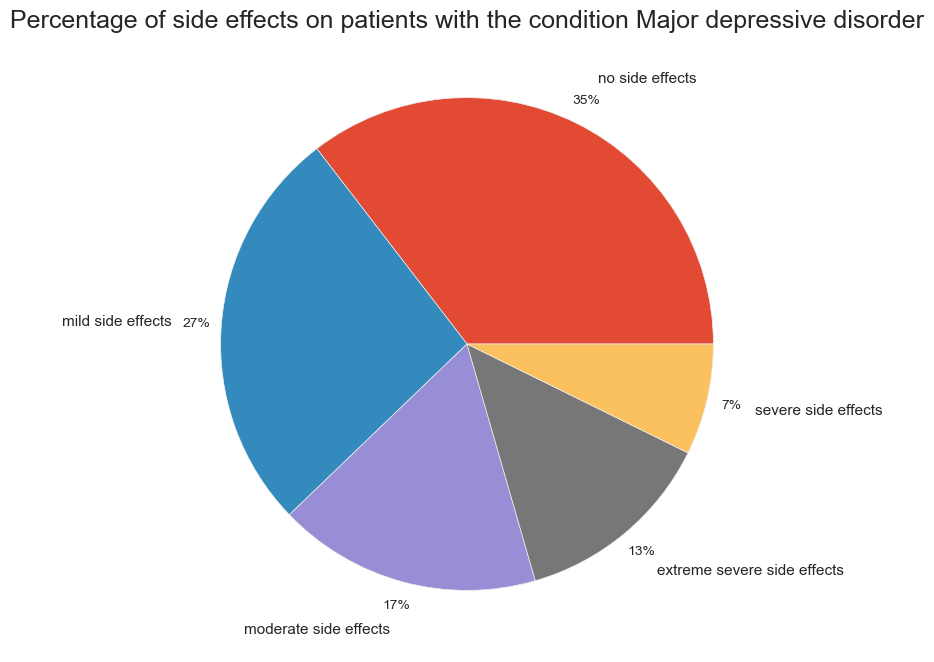

In [80]:
tr = pd.DataFrame(datac1['Effectiveness'].value_counts())[:5]
tr_names = tr.index
count = tr['Effectiveness']
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.title('Percentage of side effects on patients with the condition Major depressive disorder',fontsize=18)
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = tr_names, pctdistance=1.1, labeldistance=1.2)
plt.show()

<Figure size 1600x800 with 0 Axes>

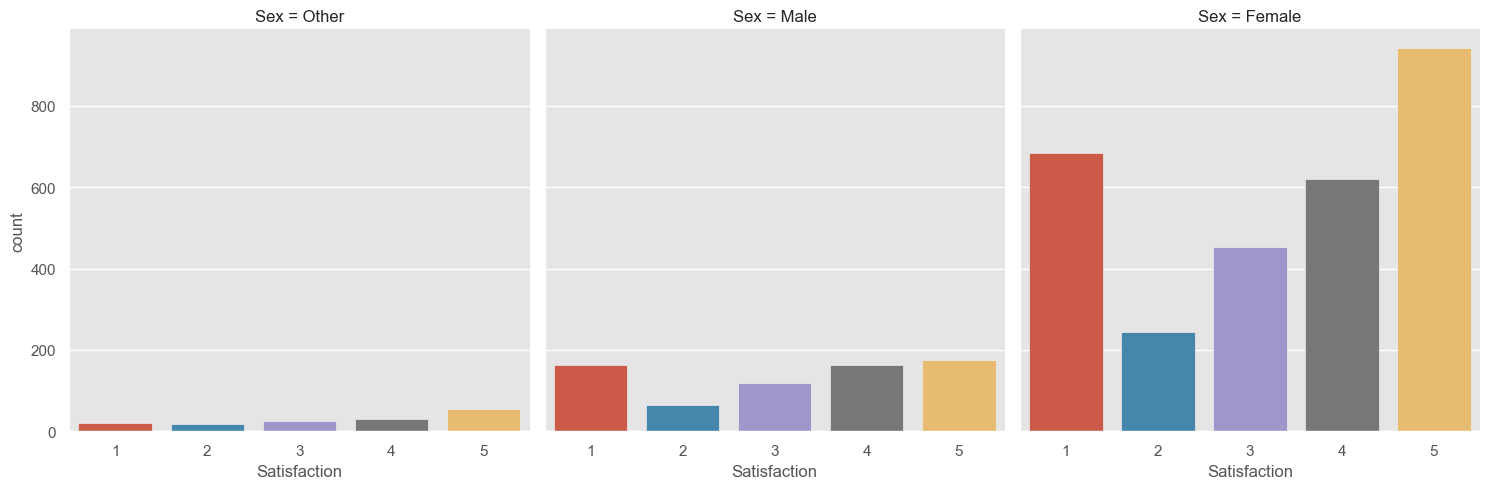

In [81]:
plt.figure(figsize = (16,8))
sns.catplot(x="Satisfaction", col="Sex",kind="count",data=data)
plt.show()

Satisfaction with respect to Sex.

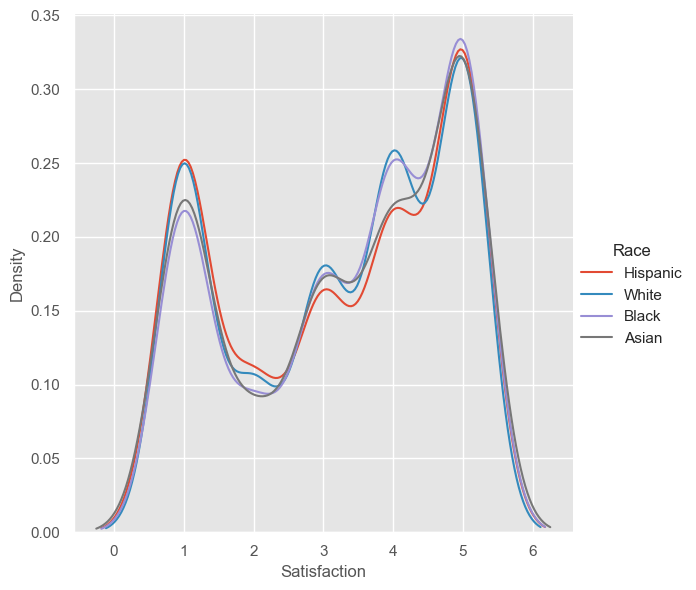

In [82]:
sns.FacetGrid(data, hue="Race", size=6) \
   .map(sns.kdeplot, "Satisfaction") \
   .add_legend()

Satisfaction with respect to Race.

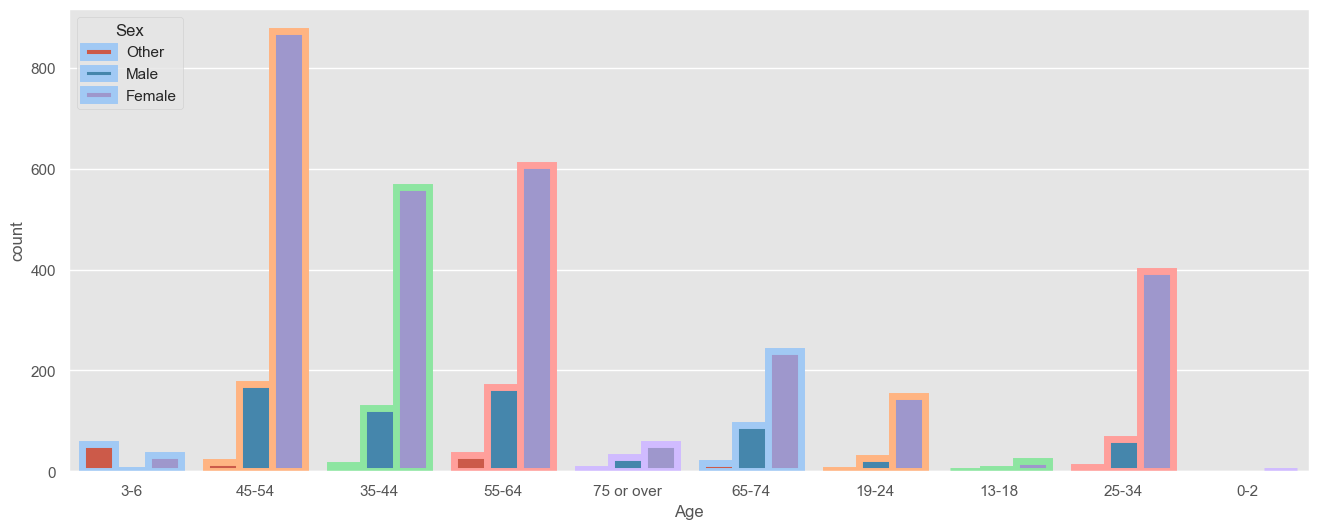

In [84]:
plt.figure(figsize=(16, 6))
AS = sns.countplot(x="Age",hue = "Sex" ,edgecolor=sns.color_palette("pastel", 5),data=data,
                   linewidth=5)
plt.show()

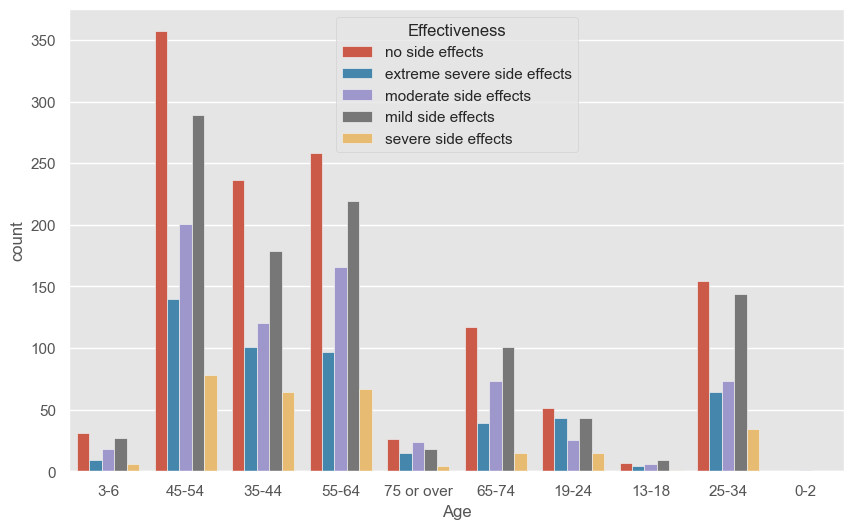

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Effectiveness',data=data)
plt.show()

Side effects according to Age.

<Figure size 1000x600 with 0 Axes>

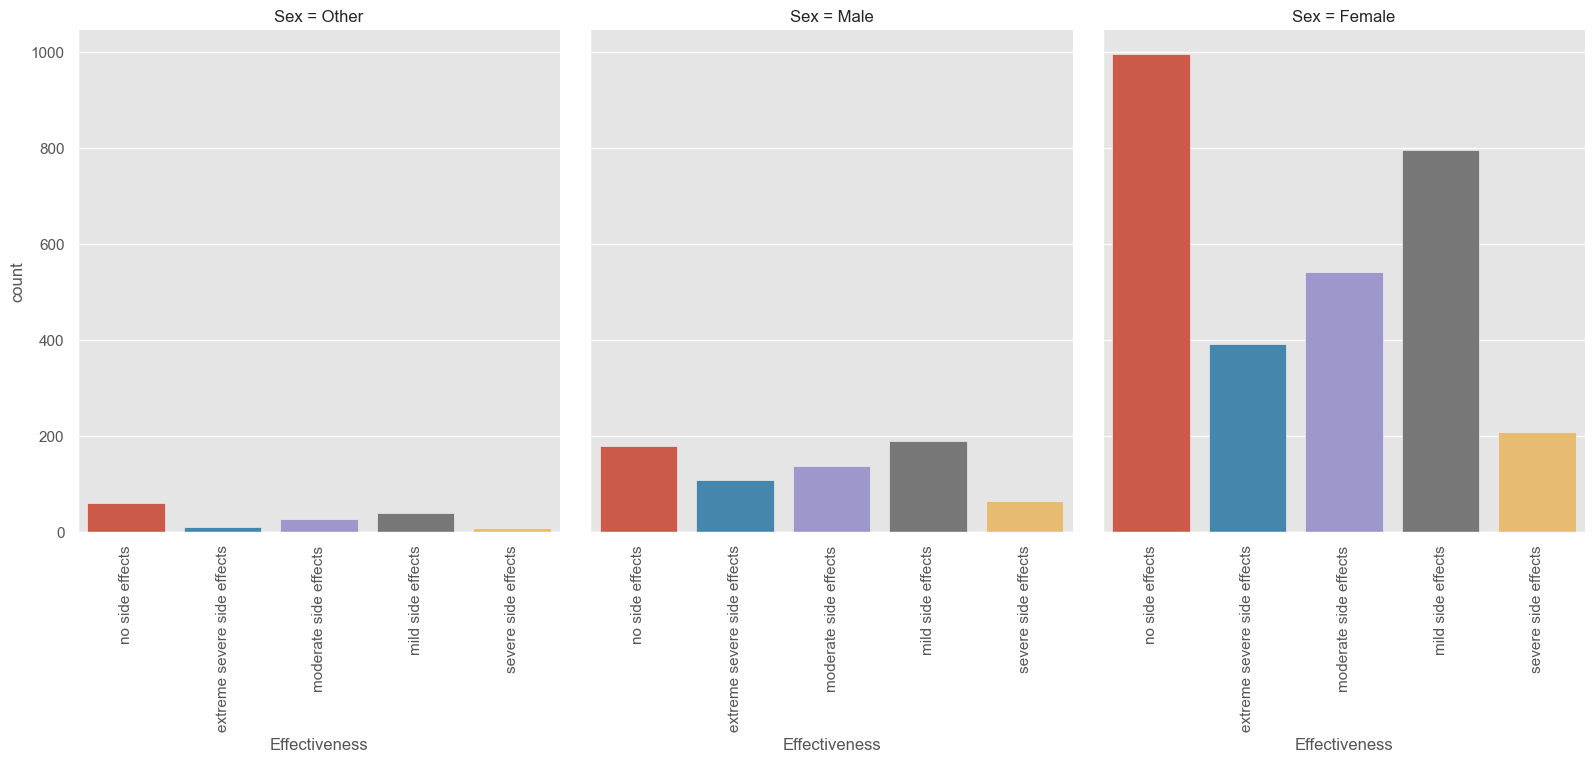

In [104]:
plt.figure(figsize=(10,6))
g = sns.catplot(x="Effectiveness",col="Sex",data=data, kind="count",height=6,aspect =.9);
g.set_xticklabels(rotation=90)
plt.show()

### Label Encoding

In [105]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ["Age","Condition","Sex","Race"]:
    data[col]=label.fit_transform(data[col])
datastand=data

### Data Splitting

In [106]:
y=data['Effectiveness']
x=data.drop(['Effectiveness'],axis=1)
x1=x
x2=x

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)

In [108]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix

### Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression()
logic.fit(x_train,y_train)
y_logic=logic.predict(x_test)

In [110]:
print("Accuracy is: ",accuracy_score(y_test,y_logic)*100)
print("Confusion Matrix: ",confusion_matrix(y_test,y_logic))

Accuracy is:  56.49867374005305
Confusion Matrix:  [[50  1  2  1  0]
 [ 7 37  8 43  0]
 [14 34 27  6  0]
 [ 3 11  2 99  0]
 [16  4 12  0  0]]


### KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [112]:
print("Accuracy is: ",accuracy_score(y_test,y_pred)*100)
print("confusion matrix is",confusion_matrix(y_test,y_pred))

Accuracy is:  54.11140583554377
confusion matrix is [[40  3  9  2  0]
 [ 8 48 14 24  1]
 [16 31 27  4  3]
 [ 2 17  7 89  0]
 [14  5 13  0  0]]


### Linear SVM

In [113]:
from sklearn.svm import LinearSVC
support=LinearSVC()
support.fit(x_train,y_train)
y_support=support.predict(x_test)

In [114]:
print("Accuracy is: ",accuracy_score(y_test,y_support)*100)
print("confusion matrix is",confusion_matrix(y_test,y_support))

Accuracy is:  52.51989389920424
confusion matrix is [[ 50   1   1   2   0]
 [  7  37   3  48   0]
 [ 14  44   6  17   0]
 [  3   7   0 105   0]
 [ 16   7   7   2   0]]


###  Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
y_decisionfine = decision.predict(x_test)

In [120]:
print("Accuracy is: ",accuracy_score(y_test,y_decisionfine)*100)
print("confusion matrix is",confusion_matrix(y_test,y_decisionfine))

Accuracy is:  49.07161803713528
confusion matrix is [[33  3 11  3  4]
 [ 6 40 16 29  4]
 [14 18 28 12  9]
 [ 3 27  5 78  2]
 [12  1 11  2  6]]


### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [122]:
y_rand=rand.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_rand))
print("confusion matrix is",confusion_matrix(y_test,y_rand))

accuracy is 0.5782493368700266
confusion matrix is [[42  3  6  2  1]
 [ 7 48 17 22  1]
 [14 20 34  7  6]
 [ 1 15  8 90  1]
 [13  3 12  0  4]]


### Gradient Boosting

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
GradientBoostingClassifier()
y_grad=grad.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,y_grad)*100)
print("confusion matrix is",confusion_matrix(y_test,y_grad))

Accuracy is:  63.395225464190986
confusion matrix is [[47  1  4  1  1]
 [ 7 48 18 21  1]
 [12 19 46  1  3]
 [ 3 10  8 94  0]
 [15  1 11  1  4]]


### STANDARDISATION

In [123]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
x=stand.fit_transform(x)

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

### Logistic Regression

In [125]:
logic1=LogisticRegression()
logic1.fit(x_train,y_train)
y_logic1=logic1.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,y_logic1)*100)

Accuracy is:  56.233421750663126


### KNN

In [126]:
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier1.fit(x_train,y_train)
y_pred1=classifier1.predict(x_test)
acc=accuracy_score(y_test,y_pred1)
print("Accuracy is: ",acc)

Accuracy is:  0.5623342175066313


### Random Forest

In [128]:
rand1=RandomForestClassifier()
rand1.fit(x_train,y_train)
y_rand1=rand1.predict(x_test)
acc=accuracy_score(y_test,y_rand1)
print("Accuracy is: ",acc)

Accuracy is:  0.5596816976127321


### Decision Tree

In [129]:
decision1=DecisionTreeClassifier()
decision1.fit(x_train,y_train)
y_decision1=decision1.predict(x_test)
acc=accuracy_score(y_test,y_decision1)
print("Accuracy is: ",acc)

Accuracy is:  0.4854111405835544


### Gradient Boosting

In [142]:
grad1=GradientBoostingClassifier()
grad1.fit(x_train,y_train)
y_grad1=grad1.predict(x_test)
acc=accuracy_score(y_test,y_grad1)
print("Accuracy is: ",acc)

Accuracy is:  0.6339522546419099


### NORMALISATION

In [132]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
x1=norm.fit_transform(x1)
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.1,random_state=42)

### Logistic Regression

In [133]:
logic2=LogisticRegression()
logic2.fit(x1_train,y_train)
y_logic2=logic2.predict(x1_test)
print(accuracy_score(y_test,y_logic2))

0.5172413793103449


### KNN

In [134]:
classifier2=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier2.fit(x1_train,y_train)
y_pred2=classifier2.predict(x1_test)
acc=accuracy_score(y_test,y_pred2)
print("Accuracy is: ",acc)

Accuracy is:  0.4880636604774536


### Random Forest

In [135]:
rand2=RandomForestClassifier()
rand2.fit(x1_train,y_train)
y_rand2=rand2.predict(x1_test)
acc=accuracy_score(y_test,y_rand2)
print("Accuracy is: ",acc)

Accuracy is:  0.5411140583554377


### Decision Tree

In [136]:
decision2=DecisionTreeClassifier()
decision2.fit(x1_train,y_train)
y_decision2=decision2.predict(x1_test)
acc=accuracy_score(y_test,y_decision2)
print("Accuracy is: ",acc)

Accuracy is:  0.4350132625994695


### Gradient Boosting

In [ ]:
grad2=GradientBoostingClassifier()
grad2.fit(x1_train,y_train)
y_grad2=grad2.predict(x1_test)
acc=accuracy_score(y_test,y_grad2)
print("Accuracy is: ",acc)

### Evaluating Model

In [143]:
y_test.value_counts()

no side effects                115
mild side effects               95
moderate side effects           81
extreme severe side effects     54
severe side effects             32
Name: Effectiveness, dtype: int64

In [144]:
df=pd.DataFrame({"y_predicted": y_grad,"original":y_test})
df.head()

,y_predicted,original
3539,no side effects,no side effects
2992,moderate side effects,mild side effects
220,severe side effects,severe side effects
2971,mild side effects,mild side effects
1953,no side effects,no side effects


In [145]:
pd.crosstab(df["y_predicted"],df["original"])

original,extreme severe side effects,mild side effects,moderate side effects,no side effects,severe side effects
y_predicted,,,,,
extreme severe side effects,47,7,12,3,15
mild side effects,1,48,19,10,1
moderate side effects,4,18,46,8,11
no side effects,1,21,1,94,1
severe side effects,1,1,3,0,4


### Insight :
The Side effect of the drug is best modelled by Gradient Boosting without doing any scaling and standardisation. People in the age group 45-54 mostly used this drug and within that the male ratio was higher. People with the condition 'Major Depressive Disorder' consumed this drug more. Over all by comparing with race also,the male ratio is higher.